In [31]:

import pandas as pd 
import seaborn as sns

file_dir = "./"
file = "export.csv"

dt = pd.read_csv(file,",",parse_dates=['DATA WYSTAWIENIA'], encoding='iso-8859-2')

/home/sdgo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   SYGNATURA             73 non-null     object        
 1   NAZWA DOKUMENTU       73 non-null     object        
 2   DATA WYSTAWIENIA      73 non-null     datetime64[ns]
 3   DODATKOWE INFORMACJE  73 non-null     object        
 4   KWOTA BRUTTO          73 non-null     int64         
 5   TERMIN PŁATNOCI      73 non-null     int64         
 6   KWOTA DO ZAPŁATY      73 non-null     object        
 7   ZAPŁACONA             73 non-null     object        
 8   Unnamed: 8            73 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 5.3+ KB


In [33]:
dt.head(5)

,SYGNATURA,NAZWA DOKUMENTU,DATA WYSTAWIENIA,DODATKOWE INFORMACJE,KWOTA BRUTTO,TERMIN PŁATNOCI,KWOTA DO ZAPŁATY,ZAPŁACONA,Unnamed: 8
0,U/07/94/9436084/0710122P5,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.01.2022,---,zapłacona
1,U/07/94/9436084/0701221P4,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.12.2021,---,zapłacona
2,U/07/94/9436084/0691121P3,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.11.2021,---,zapłacona
3,U/07/94/9436084/0681021P2,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.10.2021,---,zapłacona
4,U/07/94/9436084/0670921P1,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.09.2021,---,zapłacona


In [34]:
dt['kwota'] = dt['KWOTA BRUTTO'] +dt['TERMIN PŁATNOCI'] /100
dt['year']= pd.DatetimeIndex(dt['DATA WYSTAWIENIA']).year
dt


,SYGNATURA,NAZWA DOKUMENTU,DATA WYSTAWIENIA,DODATKOWE INFORMACJE,KWOTA BRUTTO,TERMIN PŁATNOCI,KWOTA DO ZAPŁATY,ZAPŁACONA,Unnamed: 8,kwota,year
0,U/07/94/9436084/0710122P5,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.01.2022,---,zapłacona,361.12,2021
1,U/07/94/9436084/0701221P4,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.12.2021,---,zapłacona,361.12,2021
2,U/07/94/9436084/0691121P3,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.11.2021,---,zapłacona,361.12,2021
3,U/07/94/9436084/0681021P2,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.10.2021,---,zapłacona,361.12,2021
4,U/07/94/9436084/0670921P1,Faktura prognozowana,2021-10-08,Zużycie energii: 565 kWh,361,12,07.09.2021,---,zapłacona,361.12,2021
...,...,...,...,...,...,...,...,...,...,...,...
68,U/94/9436084/0516P5,Faktura prognozowana,2016-02-25,Zużycie energii: 148 kWh,87,98,24.07.2016,---,zapłacona,87.98,2016
69,U/94/9436084/0416P4,Faktura prognozowana,2016-02-25,Zużycie energii: 148 kWh,87,98,24.06.2016,---,zapłacona,87.98,2016
70,U/94/9436084/0316P3,Faktura prognozowana,2016-02-25,Zużycie energii: 148 kWh,87,98,24.05.2016,---,zapłacona,87.98,2016
71,U/94/9436084/0216P2,Faktura prognozowana,2016-02-25,Zużycie energii: 148 kWh,87,98,24.04.2016,---,zapłacona,87.98,2016


In [42]:
graph = dt.groupby(['year'],as_index=False)["kwota"].sum()
graph

,year,kwota
0,2016,635.05
1,2017,2732.50
2,2018,2219.10
3,2019,2149.11
4,2020,2863.95
5,2021,3970.13


In [43]:
graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6 non-null      int64  
 1   kwota   6 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 224.0 bytes


/home/sdgo/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='kwota'>

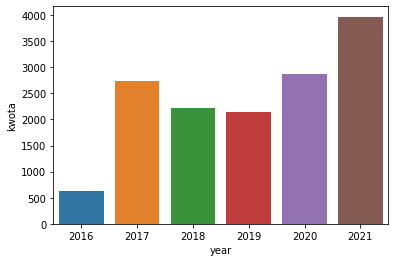

In [46]:
x = graph['year']
y = graph['kwota']
sns.barplot( x , y )